In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [3]:
dataframe = pd.read_csv('dataset.csv')
target_genres = ['pop', 'dance', 'rock','post-teen-pop', 'hip-hop', 'indie-pop', 'songwriter', 'emo', 'electronic','edm']
pattern = r'\b(?:{})\b'.format('|'.join(map(re.escape, target_genres)))
filtered_rows = dataframe[dataframe['track_genre'].isin(target_genres)]
columns = ['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre']
filtered_columns = filtered_rows[columns]
pd.set_option('future.no_silent_downcasting', True)
filtered_columns['track_genre'] = filtered_columns['track_genre'].replace({'pop': 1, 'dance': 2, 'rock': 3, 'post-teen-pop': 4, 'hip-hop': 5, 'indie-pop': 6, 'songwriter': 7, 'emo': 8, 'electronic': 9, 'edm': 10})


filtered_columns

C:\Users\14707\AppData\Local\Temp\ipykernel_24560\4175570828.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_columns['track_genre'] = filtered_columns['track_genre'].replace({'pop': 1, 'dance': 2, 'rock': 3, 'post-teen-pop': 4, 'hip-hop': 5, 'indie-pop': 6, 'songwriter': 7, 'emo': 8, 'electronic': 9, 'edm': 10})


,popularity,duration_ms,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
20000,96,184613,0.733,0.690,-5.529,0,0.0427,0.06350,0.000001,0.1050,0.310,116.992,4,2
20001,100,156943,0.714,0.472,-7.375,1,0.0864,0.01300,0.000005,0.2660,0.238,131.121,4,2
20002,73,185815,0.722,0.757,-6.207,0,0.1320,0.18500,0.000006,0.1260,0.721,140.094,4,2
20003,83,221176,0.742,0.882,-2.862,1,0.1170,0.04660,0.000000,0.2060,0.463,102.040,4,2
20004,84,244960,0.748,0.524,-5.599,1,0.0338,0.41400,0.000000,0.1110,0.661,95.010,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102995,66,248160,0.573,0.406,-11.946,1,0.0361,0.65300,0.475000,0.1230,0.376,130.021,4,7
102996,60,176853,0.690,0.582,-6.259,0,0.0333,0.35800,0.000000,0.0776,0.448,122.020,4,7
102997,42,269354,0.551,0.478,-10.580,0,0.0378,0.52600,0.000000,0.2880,0.523,98.056,4,7
102998,0,316066,0.449,0.571,-7.119,1,0.0492,0.00604,0.701000,0.0748,0.448,84.807,4,7


In [4]:
# getting class labels
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

pca = PCA(n_components=2)
data_pca = pca.fit_transform(filtered_columns)

data_pca_df = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])

gmm = GaussianMixture(n_components=5, covariance_type='full')
gmm_labels = gmm.fit_predict(data_pca_df)

data_pca_df['Cluster'] = gmm_labels

data_pca_df

,PC1,PC2,Cluster
0,-24691.319291,59.226140,0
1,-52361.319211,61.010845,0
2,-23489.319700,32.299636,0
3,11871.680465,48.591064,3
4,35655.680496,50.503913,3
...,...,...,...
8995,38855.680191,26.338644,3
8996,-32451.319930,23.120697,0
8997,60049.679770,8.361771,1
8998,106761.679011,-31.261088,1


In [5]:
X = filtered_columns.values
y = np.array(gmm_labels)


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 41)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

cfr = MLPRegressor(solver = 'adam', alpha = 0.001, hidden_layer_sizes = (14,5), activation = 'relu', random_state = 41)

cfr.fit(X_train_scaled, y_train)


c:\Users\14707\miniconda3\envs\myenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(alpha=0.001, hidden_layer_sizes=(14, 5), random_state=41)

In [74]:
predictions = pd.DataFrame(cfr.predict(X_test_scaled))

y_test = pd.DataFrame(y_test)
predictions = np.round(predictions)
predictions


,0
0,3.0
1,0.0
2,3.0
3,4.0
4,4.0
...,...
1795,0.0
1796,2.0
1797,0.0
1798,-0.0


In [71]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)

print("Mean squared error: ", mse)

Mean squared error:  0.11777777777777777


In [72]:
accuracy = 1 - mse
print("Accuracy: ", accuracy)

Accuracy:  0.8822222222222222


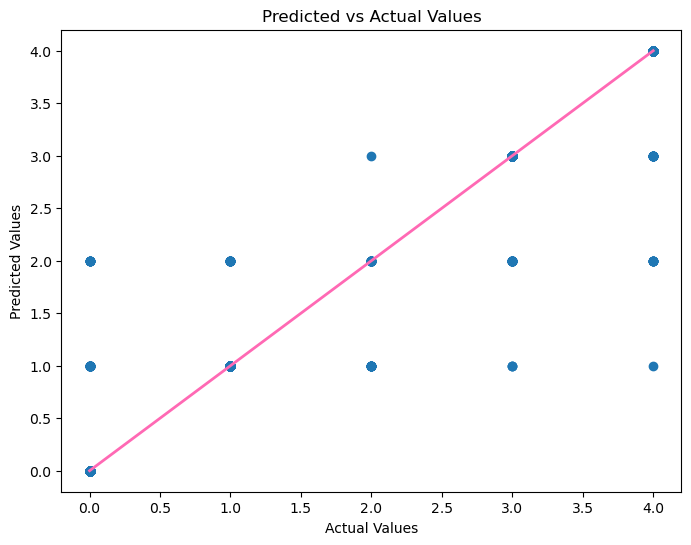

In [99]:
plt.figure(figsize = (8, 6))

x = pd.DataFrame(X_test[:, -1])

color_map = {
    1: 'red',
    2: 'green',
    3: 'blue',
    4: 'yellow',
    5: 'orange',
    6: 'purple',
    7: 'gray',
    8: 'pink',
    9: 'cyan',
    10: 'magenta'
}

predictions

# c = x.map(color_map)

plt.scatter(y_test, predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values")
plt.plot([0, 4], [0, 4], c = 'hotpink', lw = 2)

Sources:
https://github.com/flatplanet/Pytorch-Tutorial-Youtube/blob/main/simple_NeuralNetwork.ipynb
ChatGPT
https://scikit-learn.org/stable/modules/neural_networks_supervised.html